# Section:  Approximating functions - Lecture 3

## [3] Interpolation error

When interpolating a given function $f$ by a polynomial of degree $n$ at the nodes $x_0$, $\cdots$, $x_n$, it can be shown that we get the error
$$f(x) - p(x) = f[x_0, \cdots, x_n, x] \prod^n_{i=0}(x-x_i),$$
where $f[x_0, \cdots, x_n, x]$ is the notation for divided differences.

So in principle, to have a "best" interpolation we should choose nodes such that
$$P(x) = \prod^n_{i=0}(x-x_i)$$ 
is minimized, i.e., such that $\displaystyle \left\|P(x)\right\|_{\infty}$ is smallest.

In the following we use some examples to demonstrate the relation between the chosen nodes and the function $P(x)$. You will see that the Chebyshev nodes is the best.

#### Remark:
We'll use packages LinearAlgebra for solving the polynomial and PyPlot for plotting. Run <code>using Pkg; Pkg.add("PyPlot")</code> if you don't have PyPlot installed.

In [1]:
using PyPlot

We first define a function that plots the polynomial $P(x)$ for given nodes for later usage.

In [2]:
# a function that plots the corresponding polynomial with given nodes
function PlotPolynomial(x_nodes,labelstring="p(x)",l=1000::Int)
    # x: the nodes
    # l: length of the linsapce
    # labelstring: the label of the polynomial
    
    n=length(x_nodes);
    
    # construct the linspace
    xl = range(-1,stop=1,length=1000);
    
    # construct the polynomial
    p_nodes = xl .-x_nodes[1];
    for ii=1:n-1
        p_nodes = p_nodes.*(xl.-x_nodes[ii+1]);
    end
    
    # plot the polynomial
    println("max. norm of "*labelstring*"=",maximum(abs.(p_nodes)));
    plot(xl, p_nodes,label=labelstring);
    plot(x_nodes, zeros(n,1), "or");
    plt.legend();
end

PlotPolynomial (generic function with 3 methods)

### [3.1] Random Nodes
### Example 1

We first illustrate what happened if we simply choose random nodes to do the polynomial interpolation.

We choose random points on $[-1,1]$.

We would like to plot the polynomial $\displaystyle P(x)=\prod^n_{i=0}(x-x_i)$ when choosing $n+1$ random points on $[-1, 1]$ for $n=5$, $10$ and $20$.

In [22]:
# some randomly chosen points
# (Here we pick the points randomly by hand but not using the function "rand")
xi1 = [-1; -0.6; -0.4; 0.1; 0.3; 1]

6-element Array{Float64,1}:
 -1.0
 -0.6
 -0.4
  0.1
  0.3
  1.0

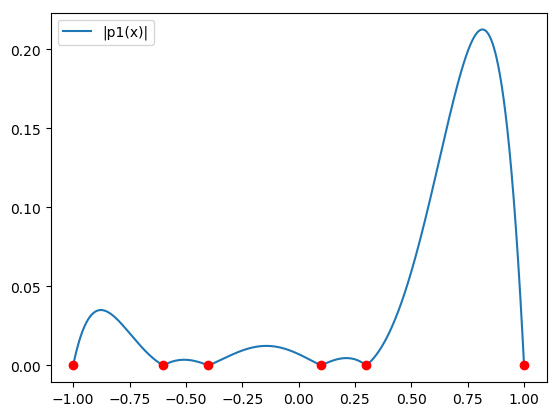

max. norm of p_1(x)=0.21256640190593978


In [23]:
# x: To plot the function we choose 1000 points in the interval
x = range(-1,stop=1,length=1000);

# constructing the function p_1(x)
p1 = x.-xi1[1];
for ii=1:5
    p1 = p1.*(x.-xi1[ii+1]);
end

# print the max. norm of p_1(x)
println("max. norm of p_1(x)=",maximum(abs.(p1)))

# plotting
using PyPlot
plot(x, abs.(p1),label="|p1(x)|");
plot(xi1, zeros(6,1), "or");
plt.legend();

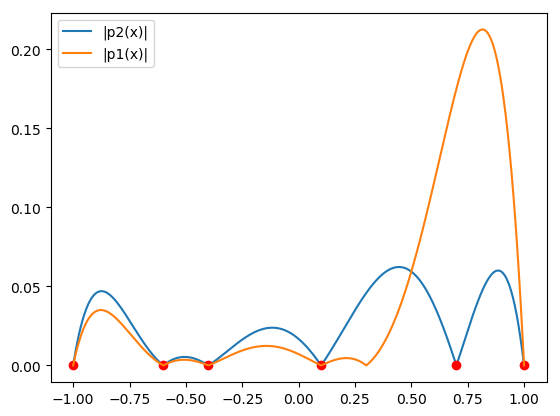

max. norm of p_2(x)=0.06230075192531127


In [24]:
# constructing the nodes
xi2 = zeros(6,1);
for ii=1:6
    xi2[ii] = xi1[ii];
end
xi2[5] = 0.7;

# constructing the function p_2(x)
p2 = x.-xi2[1];
for ii=1:5
    p2 = p2.*(x.-xi2[ii+1]);
end

# print the max. norm of p_2(x)
println("max. norm of p_2(x)=",maximum(abs.(p2)))

# plotting
plot(x, abs.(p2),label="|p2(x)|");
plot(xi2, zeros(n,1), "or");
plot(x, abs.(p1),label="|p1(x)|");
plt.legend();

### [3.2] Equally spaced Nodes

Now let's try uniformly distributed points on $[-1,1]$:
$$x_k = -1 + 2\frac{k}{n} \quad k=0,1,2,\cdots,n,$$


### Example 2
We would like to plot the polynomial $\displaystyle P(x)=\prod^n_{i=0}(x-x_i)$ when choose $n+1$ equally spaced points on $[-1, 1]$ for $n=5$, $10$ and $20$.

max. norm of p(x)=0.

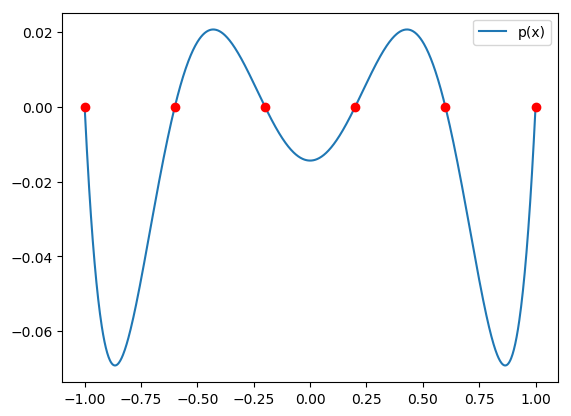

06922546010398747


In [3]:
# 2*(0:n)/n .-1  gives the equally spaced nodes with integer n
n=5;
PlotPolynomial(2*(0:n)/n .-1);

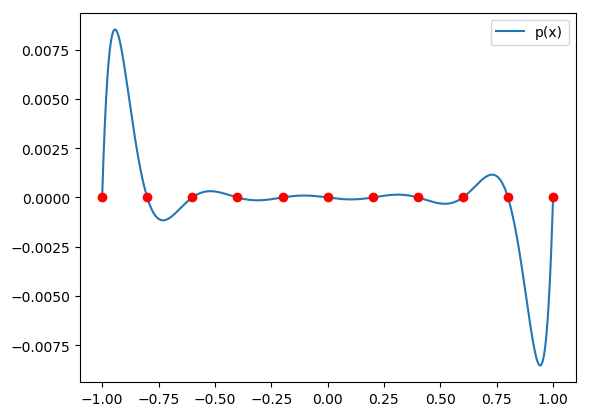

max. norm of p(x)=0.008530768039898246


In [4]:
n=10;
PlotPolynomial(2*(0:n)/n .-1);

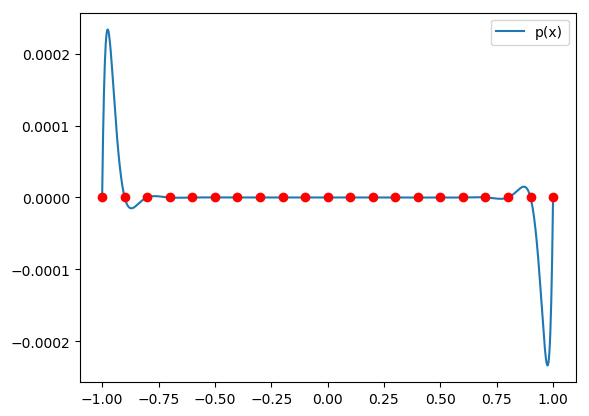

max. norm of p(x)=0.00023361682788821547


In [5]:
n=20;
PlotPolynomial(2*(0:n)/n .-1);

### [3.3] Chebyshev Nodes of the first kind

Consider chebychev nodes
$$x_k := \cos\left(\frac{2k-1}{2n}\pi\right)$$ for $k=1,2,\cdots,n$

### Example 3
We would like to plot the polynomial $\displaystyle P(x)=\prod^n_{i=0}(x-x_i)$ when choose $n$ Chebyshev Nodes of the first kind for $n=5$, $10$ and $20$.

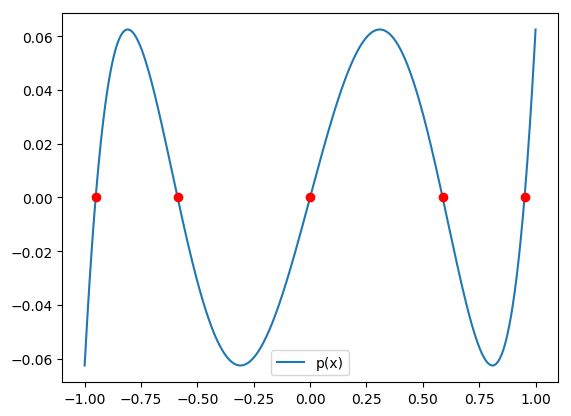

max. norm of p(x)=0.06250000000000008


In [6]:
# cos.(((1:n).-0.5)*pi/n) gives the Chebyshev nodes of the first kind for integrer n
n=5;
PlotPolynomial(cos.(((1:n).-0.5)*pi/n));

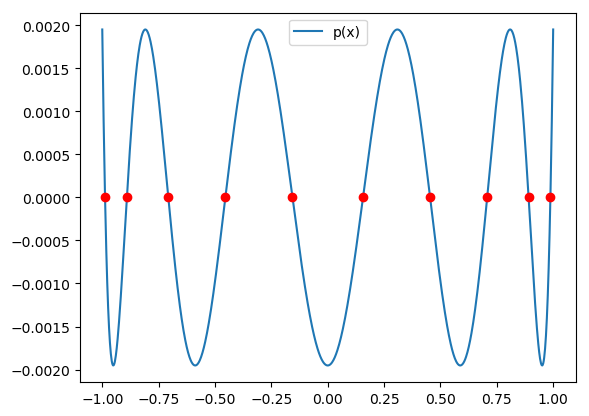

max. norm of p(x)=0.0019531250000000126


In [7]:
n=10;
PlotPolynomial(cos.(((1:n).-0.5)*pi/n));

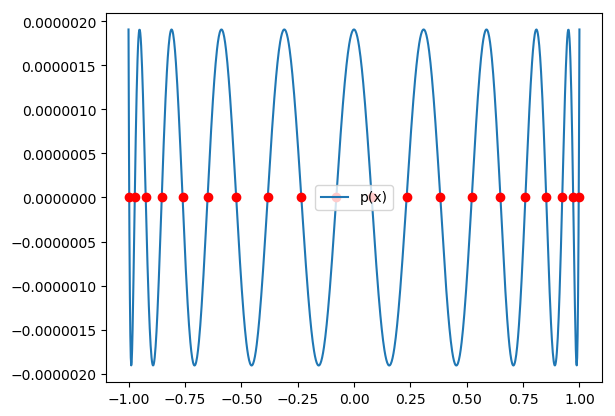

max. norm of p(x)=1.907348632812514e-6


In [8]:
n=20;
PlotPolynomial(cos.(((1:n).-0.5)*pi/n));

### [3.35] Notes on Chebyshev Nodes of the first kind

Consider polynomial interpolation of some function $f$ on $[-1, 1]$ using Chebyshev Nodes of the first kind:
$$x_k = \cos\left(\frac{2k-1}{2n}\pi\right) \quad k=1,2,\cdots,n.$$
Then, construct $p(x)$ by determinating the $n-1$ degree polynomial that has value $f(x_k)$ at $x_k$ for each $k$.
One can prove that
$$|f(x)-p(x)| \leq \frac{1}{2^{n-1}n!}\max_{\xi\in[-1,1]}|f^{n}(\xi)|,$$
which gives us small error as $n$ become large.

For more details one can read "Chebyshev nodes" in [wiki](https://en.wikipedia.org/wiki/Chebyshev_nodes).

### [3.4] Chebyshev Nodes of the second kind

Consider chebychev nodes of the second kind:
$$x_k = \cos\left(\frac{k}{n}\pi\right) \quad k=0,1,2,\cdots,n.$$

### Example 4
We would like to plot the polynomial $\displaystyle P(x)=\prod^n_{i=0}(x-x_i)$ when choose $n+1$ Chebyshev Nodes of the second kind for $n=5$, $10$ and $20$.

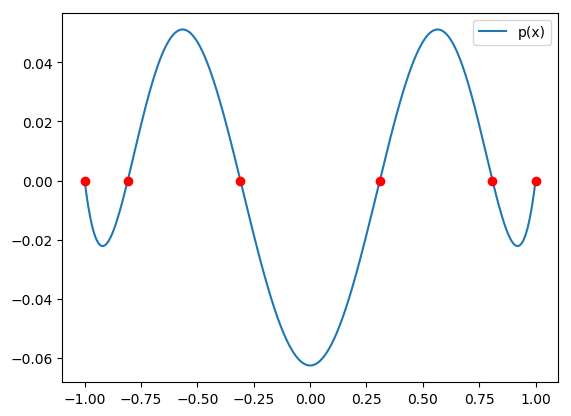

max. norm of p(x)=0.06249918587431625


In [9]:
# cos.((0:n)*pi/n) gives the Chebyshev nodes of the second kind with integer n
n=5;
PlotPolynomial(cos.((0:n)*pi/n));

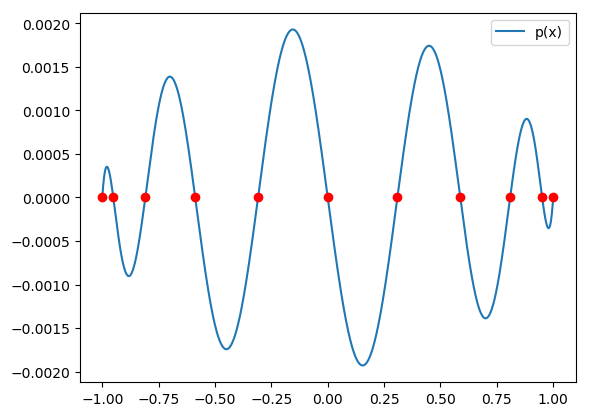

max. norm of p(x)=0.0019293110619113985


In [10]:
n=10;
PlotPolynomial(cos.((0:n)*pi/n));

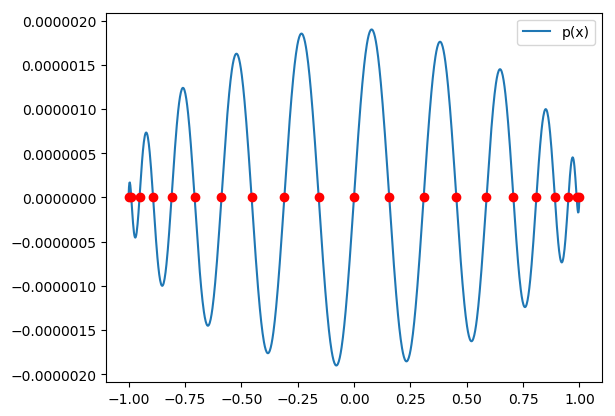

max. norm of p(x)=1.9012283962444363e-6


In [11]:
n=20;
PlotPolynomial(cos.((0:n)*pi/n));